In [47]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [1]:
import keras
from keras import layers

encoding_dim=32

input_img = keras.Input(shape=(784,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)


autoencoder = keras.Model(input_img, decoded)

### Model Training Segment

In [2]:
encoder = keras.Model(input_img, encoded)

In [3]:
encoded_input = keras.Input(shape=(encoding_dim,))

decoder_layer = autoencoder.layers[-1]

decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [4]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [5]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [6]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [7]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 2s 7ms/step - loss: 0.2784 - val_loss: 0.1903
Epoch 2/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1703 - val_loss: 0.1540
Epoch 3/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1452 - val_loss: 0.1347
Epoch 4/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1294 - val_loss: 0.1221
Epoch 5/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1194 - val_loss: 0.1143
Epoch 6/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1126 - val_loss: 0.1085
Epoch 7/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1076 - val_loss: 0.1044
Epoch 8/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1038 - val_loss: 0.1010
Epoch 9/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1011 - val_loss: 0.0987
Epoch 10/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0992 - val_loss: 0.0971

In [8]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 1ms/step


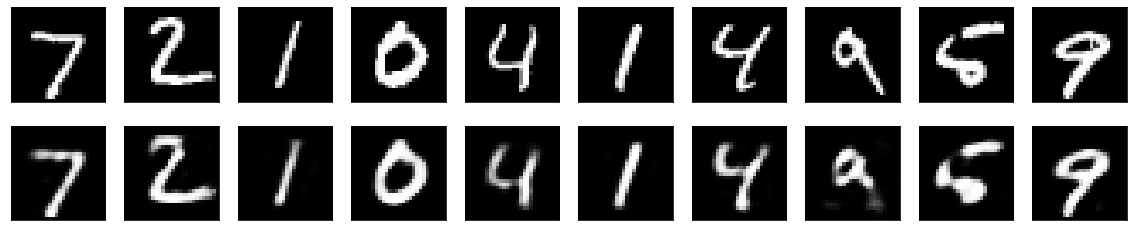

In [9]:
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Lots of loss (9%). Adding Sparsity Constraint so the model doesn't overthink and overlearn (*known as overfitting*)

In [10]:
from keras import regularizers

encoding_dim = 32

input_img = keras.Input(shape=(784,))
# Add a Dense layer with a L1 activity regularizer
encoded = layers.Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

In [11]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

# Now Epoch is at 100 rather than 50. Train more times to ensure it learns better. Train too much, and it starts to overfit
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 3s 9ms/step - loss: 0.2446 - val_loss: 0.1657
Epoch 2/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1491 - val_loss: 0.1353
Epoch 3/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1308 - val_loss: 0.1247
Epoch 4/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1229 - val_loss: 0.1182
Epoch 5/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1176 - val_loss: 0.1144
Epoch 6/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1137 - val_loss: 0.1104
Epoch 7/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1099 - val_loss: 0.1070
Epoch 8/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1071 - val_loss: 0.1045
Epoch 9/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1047 - val_loss: 0.1020
Epoch 10/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1027 - val_lo

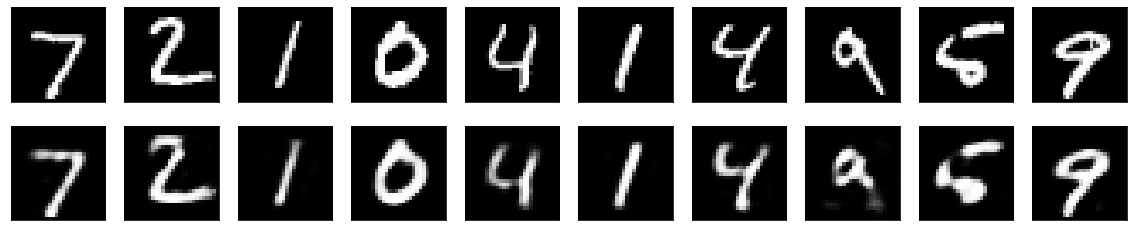

In [13]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Variational AutoEncoder Visualization

In [55]:
original_dim = 28 * 28
intermediate_dim = 64
latent_dim = 2

inputs = keras.Input(shape=(original_dim,))
h = layers.Dense(intermediate_dim, activation='relu')(inputs)
z_mean = layers.Dense(latent_dim)(h)
z_log_sigma = layers.Dense(latent_dim)(h)

In [56]:
from keras import backend as K

def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                              mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_sigma) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_sigma])

In [57]:
# Create encoder
encoder = keras.Model(inputs, [z_mean, z_log_sigma, z], name='encoder')

# Create decoder
latent_inputs = keras.Input(shape=(latent_dim,), name='z_sampling')
x = layers.Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = layers.Dense(original_dim, activation='sigmoid')(x)
decoder = keras.Model(latent_inputs, outputs, name='decoder')

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = keras.Model(inputs, outputs, name='vae_mlp')

In [58]:
reconstruction_loss = keras.losses.binary_crossentropy(inputs, outputs)
reconstruction_loss *= original_dim
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

In [59]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

vae.fit(x_train, x_train,
        epochs=100,
        batch_size=32,
        validation_data=(x_test, x_test))

Epoch 1/100
1875/1875 [==============================] - 7s 3ms/step - loss: 189.3314 - val_loss: 168.0930
Epoch 2/100
1875/1875 [==============================] - 6s 3ms/step - loss: 165.7427 - val_loss: 164.0452
Epoch 3/100
1875/1875 [==============================] - 6s 3ms/step - loss: 162.3972 - val_loss: 161.6496
Epoch 4/100
1875/1875 [==============================] - 6s 3ms/step - loss: 160.3748 - val_loss: 159.7146
Epoch 5/100
1875/1875 [==============================] - 6s 3ms/step - loss: 158.7478 - val_loss: 158.4000
Epoch 6/100
1875/1875 [==============================] - 6s 3ms/step - loss: 157.3730 - val_loss: 157.1181
Epoch 7/100
1875/1875 [==============================] - 6s 3ms/step - loss: 156.1993 - val_loss: 155.8356
Epoch 8/100
1875/1875 [==============================] - 6s 3ms/step - loss: 155.1932 - val_loss: 155.0065
Epoch 9/100
1875/1875 [==============================] - 6s 3ms/step - loss: 154.3605 - val_loss: 154.4837
Epoch 10/100
1875/1875 [=============

Epoch 77/100
1875/1875 [==============================] - 6s 3ms/step - loss: 145.2547 - val_loss: 147.6552
Epoch 78/100
1875/1875 [==============================] - 6s 3ms/step - loss: 145.2113 - val_loss: 147.5376
Epoch 79/100
1875/1875 [==============================] - 6s 3ms/step - loss: 145.1738 - val_loss: 147.4937
Epoch 80/100
1875/1875 [==============================] - 6s 3ms/step - loss: 145.1382 - val_loss: 147.4672
Epoch 81/100
1875/1875 [==============================] - 6s 3ms/step - loss: 145.1384 - val_loss: 147.4840
Epoch 82/100
1875/1875 [==============================] - 6s 3ms/step - loss: 145.0861 - val_loss: 147.5676
Epoch 83/100
1875/1875 [==============================] - 6s 3ms/step - loss: 145.0421 - val_loss: 147.7140
Epoch 84/100
1875/1875 [==============================] - 6s 3ms/step - loss: 145.0225 - val_loss: 147.3007
Epoch 85/100
1875/1875 [==============================] - 6s 3ms/step - loss: 144.9898 - val_loss: 147.3506
Epoch 86/100
1875/1875 [====

### A section of this code segment was deprecated, so the plot dimension parameters are different again. The below image is what the original output was supposed to be. 
### The idea is that given the model's predictions, it would visualize the learning pattern across MNIST data, and help understand which numbers look more alike to one another, resulting in mislearnings. An example would be "9" looking alot like "7" and "4" when written horribly

313/313 [==============================] - 1s 2ms/step


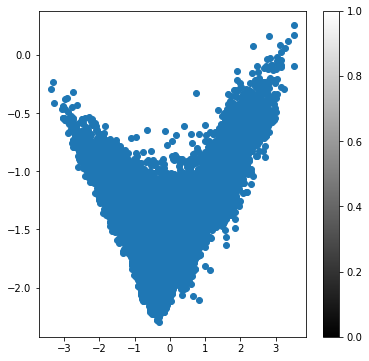

In [70]:
x_test_encoded = encoder.predict(x_test, batch_size=batch_size)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:][0], x_test_encoded[:][1])
plt.colorbar()
plt.show()

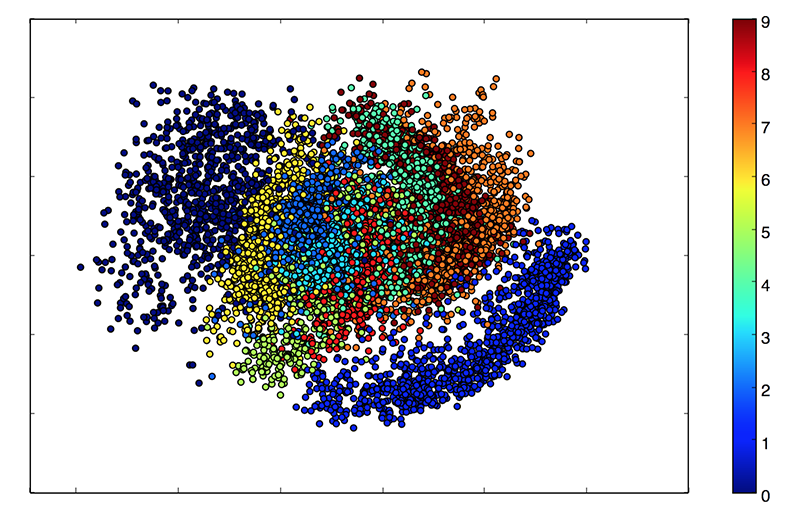

1/1 [==============================] - 0s 19ms/step


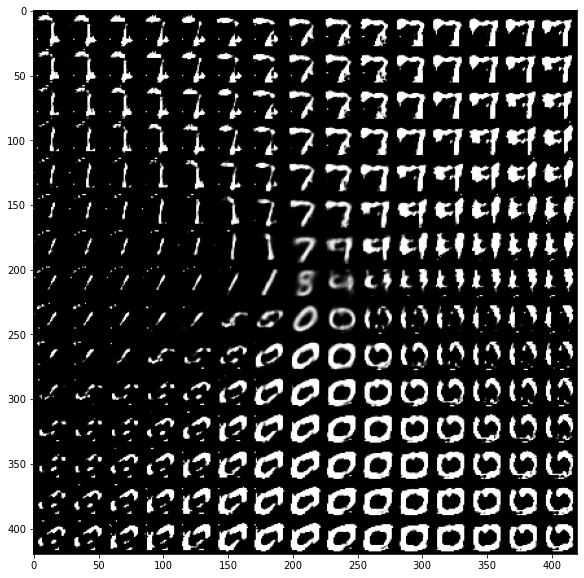

In [21]:
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# We will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()